# 0. Initialize

## 0.1. Import Libraries

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, glob
import gzip
import random
import tqdm
import json
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

from IPython import display
import matplotlib as mpl
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import re    # for regular expressions 
import nltk  # for text manipulation  
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 0.2. DEFINE VARIABLES 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/MyDrive/CS412/Project/raw_data/'
DATA_PATH_ANOT = '/content/drive/MyDrive/CS412/Project/'

ROUND = 3 # This project will have 3 rounds of predictions: 1,2,3
STUDENT_ID = '28132'#'<insert-your-id-here>'
PROJECT_CODE = 'CS4121ea1171ede6f'#'<insert-your-code-here>' # Same code for the annotation eg. CS412xxxxx

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).






## 0.3. Read Training & Evaluation Data

### 0.3.1. Get the labels for tweets

In [ ]:
#trainingTweetDf = pd.read_csv('{}training-tweet.csv'.format(DATA_PATH))
trainingTweetDf = pd.read_csv('{}training-tweet.csv'.format(DATA_PATH), dtype={'tweet_id': str, 'isPolitical': str})
print(trainingTweetDf.shape)

(3000, 2)


In [ ]:
trainingTweetDf.isPolitical.value_counts()

Yes    2003
No      997
Name: isPolitical, dtype: int64

### 0.3.2. Get the labels for users

In [ ]:
trainingUserDf = pd.read_csv('{}training-user.csv'.format(DATA_PATH))
#trainingUserDf = pd.read_csv('training-user.csv')
print(trainingUserDf.shape)

(3000, 2)


In [ ]:
trainingUserDf.isBot.value_counts()

No     2424
Yes     576
Name: isBot, dtype: int64

### 0.3.3. Expand your dataset with metadata and tweets

In [ ]:
# You can also expand training data by downloading your own labeled datasets following the link
# Download the documents under "Link to training data"

print('http://www.onurvarol.com/Annotation-CS412-202201/reports/report_{}.html'.format(PROJECT_CODE))

http://www.onurvarol.com/Annotation-CS412-202201/reports/report_CS4121ea1171ede6f.html


#### 0.3.3.1 Merging annotation data - User



In [ ]:
## Annotation 1 - User
"""
trainingUserDf_annot1 = pd.read_csv('{}annotated_users_CS4121ea1171ede6f.csv'.format(DATA_PATH_ANOT))
#trainingUserDf = pd.read_csv('training-user.csv')
trainingUserDf_annot1.rename(columns = {'Unnamed: 0':'screen_name'}, inplace = True)
trainingUserDf_annot1 = trainingUserDf_annot1[['screen_name','isBot']]
"""

"\ntrainingUserDf_annot1 = pd.read_csv('{}annotated_users_CS4121ea1171ede6f.csv'.format(DATA_PATH_ANOT))\n#trainingUserDf = pd.read_csv('training-user.csv')\ntrainingUserDf_annot1.rename(columns = {'Unnamed: 0':'screen_name'}, inplace = True)\ntrainingUserDf_annot1 = trainingUserDf_annot1[['screen_name','isBot']]\n"

In [ ]:
## Annotation 2 - User
"""
trainingUserDf_annot2 = pd.read_csv('{}annotated_users_CS412b94afc78fb0f.csv'.format(DATA_PATH_ANOT))
#trainingUserDf = pd.read_csv('training-user.csv')
trainingUserDf_annot2.rename(columns = {'Unnamed: 0':'screen_name'}, inplace = True)
trainingUserDf_annot2 = trainingUserDf_annot2[['screen_name','isBot']]
"""

"\ntrainingUserDf_annot2 = pd.read_csv('{}annotated_users_CS412b94afc78fb0f.csv'.format(DATA_PATH_ANOT))\n#trainingUserDf = pd.read_csv('training-user.csv')\ntrainingUserDf_annot2.rename(columns = {'Unnamed: 0':'screen_name'}, inplace = True)\ntrainingUserDf_annot2 = trainingUserDf_annot2[['screen_name','isBot']]\n"

In [ ]:
"""
trainingUserDf = pd.concat([trainingUserDf, trainingUserDf_annot1, trainingUserDf_annot2], axis=0)
trainingUserDf = trainingUserDf[trainingUserDf['isBot'] != 'Not sure']
print(trainingUserDf.shape)
"""

"\ntrainingUserDf = pd.concat([trainingUserDf, trainingUserDf_annot1, trainingUserDf_annot2], axis=0)\ntrainingUserDf = trainingUserDf[trainingUserDf['isBot'] != 'Not sure']\nprint(trainingUserDf.shape)\n"

In [ ]:
trainingUserDf.isBot.value_counts()

No     2424
Yes     576
Name: isBot, dtype: int64

#### 0.3.1.2 Merging annotation data - Tweet



In [ ]:
## Annotation 1 - Tweet
"""
trainingTweetDf_annot1 = pd.read_csv('{}annotated_tweets_CS4121ea1171ede6f.csv'.format(DATA_PATH_ANOT), dtype={'Unnamed: 0': str, 'isPolitical': str})
#trainingUserDf = pd.read_csv('training-user.csv')
trainingTweetDf_annot1.rename(columns = {'Unnamed: 0':'tweet_id'}, inplace = True)
trainingTweetDf_annot1 = trainingTweetDf_annot1[['tweet_id','isPolitical']]

"""

"\ntrainingTweetDf_annot1 = pd.read_csv('{}annotated_tweets_CS4121ea1171ede6f.csv'.format(DATA_PATH_ANOT), dtype={'Unnamed: 0': str, 'isPolitical': str})\n#trainingUserDf = pd.read_csv('training-user.csv')\ntrainingTweetDf_annot1.rename(columns = {'Unnamed: 0':'tweet_id'}, inplace = True)\ntrainingTweetDf_annot1 = trainingTweetDf_annot1[['tweet_id','isPolitical']]\n\n"

In [ ]:
## Annotation 2 - Tweet
"""
trainingTweetDf_annot2 = pd.read_csv('{}annotated_tweets_CS412b94afc78fb0f.csv'.format(DATA_PATH_ANOT), dtype={'Unnamed: 0': str, 'isPolitical': str})
#trainingUserDf = pd.read_csv('training-user.csv')
trainingTweetDf_annot2.rename(columns = {'Unnamed: 0':'tweet_id'}, inplace = True)
trainingTweetDf_annot2 = trainingTweetDf_annot2[['tweet_id','isPolitical']]
print(trainingTweetDf_annot1.dtypes)
"""

"\ntrainingTweetDf_annot2 = pd.read_csv('{}annotated_tweets_CS412b94afc78fb0f.csv'.format(DATA_PATH_ANOT), dtype={'Unnamed: 0': str, 'isPolitical': str})\n#trainingUserDf = pd.read_csv('training-user.csv')\ntrainingTweetDf_annot2.rename(columns = {'Unnamed: 0':'tweet_id'}, inplace = True)\ntrainingTweetDf_annot2 = trainingTweetDf_annot2[['tweet_id','isPolitical']]\nprint(trainingTweetDf_annot1.dtypes)\n"

In [ ]:
"""
trainingTweetDf = pd.concat([trainingTweetDf, trainingTweetDf_annot1, trainingTweetDf_annot2], axis=0)
print(trainingTweetDf.shape)
"""

'\ntrainingTweetDf = pd.concat([trainingTweetDf, trainingTweetDf_annot1, trainingTweetDf_annot2], axis=0)\nprint(trainingTweetDf.shape)\n'

In [ ]:
trainingTweetDf.isPolitical.value_counts()

Yes    2003
No      997
Name: isPolitical, dtype: int64

# 1. EXTRACT FEATURES
Under *1.1. Political Tweet Detection* and *1.2. Bot Detection*, we firstly collect raw data for processing. We then combine some of them (total_interactions = num_favorites + num_retweets) or use them to extract features (whether the tweet has one of the political entities @meralaksener, @kilicdarogluk etc.).

We expect you to collect more raw data from **tweet_metadata**, **user_profiles** and **user_tweets** files by creating a function as shown in below examples such as *check_if_retweet()* and using it while iterating over data as shown under *Merge Collected Features*.

We also expect you to create new variables as much as you can from the data in order to make your predictions more accurate. For example, you may want to check:

- The tweet sources that a user frequently uses
- Whether the user is a verified account or not

...

to assess whether **a user is a bot or not** and whether **a tweet is political or not**.

In [ ]:
PATH_TO_DOWNLOADED = DATA_PATH # 'D:/Users/suuser/Desktop/Sabancı/CS412/spring-2022/project/'

## 1.1. Political Tweet Detection
This part stands for the feature extraction of tweets. We start with collecting the raw data from *tweet_metadata*, then use some of them to extract features.

### 1.1.1. Get Raw Data

#### 1.1.1.1. Check if Retweet

In [ ]:
def check_if_retweet(tweet_metadata_line):
    is_retweet = 0
    retweeted_username = None

    try:
        tweet_metadata_line['retweeted_status']
        retweeted_username = tweet_metadata_line['retweeted_status']['user']['screen_name'].lower()
        is_retweet = 1

    except KeyError:
        pass

    return is_retweet, retweeted_username

#### 1.1.1.2. Get Tweet Text

In [ ]:
def get_tweet_text(tweet_metadata_line):
    text = tweet_metadata_line['text']
    
    return text

#### 1.1.1.3. Get Tweet ID

In [ ]:
def get_tweet_id(tweet_metadata_line):
    id_str = tweet_metadata_line['id_str']
    
    return id_str

#### 1.1.1.4. Get Number of Mentions and Hashtags

In [ ]:
def get_number_mentions_hashtags(tweet_metadata_line):
    num_mentions = len(tweet_metadata_line['entities']['user_mentions'])
    num_hashtags = len(tweet_metadata_line['entities']['hashtags'])

    return num_mentions, num_hashtags

#### 1.1.1.5. Get Number of Retweets and Favorites

In [ ]:
def get_number_retweets_favorites(tweet_metadata_line):
    retweet_count = tweet_metadata_line['retweet_count']
    favorite_count = tweet_metadata_line['favorite_count']
    
    return retweet_count, favorite_count

#### 1.1.1.6. Get User Info

In [ ]:
def get_user_info(tweet_metadata_line):
    id = tweet_metadata_line['user']['id_str']
    screen_name = tweet_metadata_line['user']['screen_name'].lower()
    description = tweet_metadata_line['user']['description']

    return id, screen_name, description

### 1.1.2. Derive Manually Crafted Features

#### 1.1.2.1. Check for political entity in text

In [ ]:
def check_political_ent(text):
    
    # the list below can be modified and some new names may be added (or removed)
    list_of_entities = ['meral_aksener', 'kilicdarogluk', 'vekilince', 'RTErdogan', 'MevlutCavusoglu', 'umitozdag']
    
    entities_in_text = [ent for ent in list_of_entities if ent.lower() in text.lower()]
    number_entities = len(entities_in_text)

    return number_entities

#### 1.1.2.2. Number of total interactions

In [ ]:
def total_interactions(retweet_count, favorite_count):
    total_num_interactions = retweet_count + favorite_count
    
    return total_num_interactions

#### 1.1.2.3. Length of tweet

In [ ]:
def get_tweet_length(text):
  return len(text)

### 1.1.2. Collect data using the functions above and transform into a Pandas DataFrame

In [ ]:
dfPolitical = {'tweet_id':[],
              'is_retweet':[],
              'retweeted_username':[],
              'text':[],
              'num_mentions':[],
              'num_hashtags':[],
              'num_retweets':[],
              'num_favorites':[],
              'user_id':[],
              'user_screen_name':[],
              'user_description':[],
              'num_political_entities':[],
              'total_interactions':[],
              'tweet_length': []}


with gzip.open(f"{PATH_TO_DOWNLOADED}tweet_metadata.jsons.gz", "rb") as f:
    for line in f:
        line = json.loads(line)
        
        # raw data:
        id_str = get_tweet_id(line)
        is_retweet, retweeted_username = check_if_retweet(line)
        text = get_tweet_text(line)
        num_mentions, num_hashtags = get_number_mentions_hashtags(line)
        retweet_count, favorite_count = get_number_retweets_favorites(line)
        user_id_str, screen_name, user_description = get_user_info(line)

        # manually crafted data:
        num_political_entities = check_political_ent(text)
        total_num_interactions = total_interactions(retweet_count, favorite_count)
        num_tweet_length = get_tweet_length(text)

        dfPolitical['tweet_id'].append(id_str)
        dfPolitical['is_retweet'].append(is_retweet)
        dfPolitical['retweeted_username'].append(retweeted_username)
        dfPolitical['text'].append(text)
        dfPolitical['num_mentions'].append(num_mentions)
        dfPolitical['num_hashtags'].append(num_hashtags)
        dfPolitical['num_retweets'].append(retweet_count)
        dfPolitical['num_favorites'].append(favorite_count)
        dfPolitical['user_id'].append(user_id_str)
        dfPolitical['user_screen_name'].append(screen_name)
        dfPolitical['user_description'].append(user_description)
        dfPolitical['num_political_entities'].append(num_political_entities)
        dfPolitical['total_interactions'].append(total_num_interactions)
        dfPolitical['tweet_length'].append(num_tweet_length)


In [ ]:
dfPolitical = pd.DataFrame(dfPolitical)
dfPolitical

,tweet_id,is_retweet,retweeted_username,text,num_mentions,num_hashtags,num_retweets,num_favorites,user_id,user_screen_name,user_description,num_political_entities,total_interactions,tweet_length
0,1588568792984346624,0,None,"Sosyal Hizmetin temelini çocuk oluşturur,çocuğun biyopsikososyal gelişim temellerinin atıldığı eğitim-öğretim haya… https://t.co/BjpnjmPfL0",0,0,49,98,920963718103650304,maviruh_,shu/\nburaya afilli bir söz yazdığımı varsayın,0,147,140
1,1588452263047069697,0,None,"@mahirunal Gavur İzmir ya onlar, hani Cumhuriyetle seni manevi değerlerinden koparan gavur İzmir.",1,0,0,0,595514060,mtfdan,,0,0,97
2,1569589330544398336,0,None,"#ŞehitAdayıUzmÇvşaKadro\nSiz İstesenizde Istemesenizde Biz TSK’nın birer Ferdiyiz..SAVAŞDA en önde giden, egitimde e… https://t.co/1AKtK6bGxF",0,1,0,0,1356375754561490947,ahsucilginuzman,Vatan Sevdalisi,0,0,140
3,1570428119609139201,0,None,@ajans_muhbir Siz kaypak olmayıp onay vermeseydiniz Nato ya girmelerine bu gün halen yalvarıyo olacaklardı. Ama siz… https://t.co/iwuQXJF2qP,1,0,0,0,1478775431008595968,hamitelkelle,HighOne,0,0,140
4,1551163840368414722,0,None,"Engelli öğretmenler olarak önümüzdeki engellerin kaldırılmasını,Bütün Engelli öğretmenlerin atanmasini ve Kontenjan… https://t.co/fKP51ln8mm",0,0,0,0,1511976696337113088,sed58417690,,0,0,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33528,1568595408233832448,0,None,"Gerçek kimlik taşımayan hesaplara cevap vermem, ama burada şunu söylemem lazım\nAyıptır\nHangi yazım ve yorumumda mil… https://t.co/ufremPhQiA",0,0,9,81,576247173,ardanzenturk,RT ONAYLADIĞIM ANLAMINA GELMEZ\nArtık fikirleri yeni mecralardan söyleme zamanı\nhttps://t.co/XaF99mWGX3,0,90,140
33529,1584027427696959488,0,None,@umitozdag Neden Suriyelilerle ilgili bu kadar derdin var. O topraklar 100 yıl önce bizimdi onlar bizim vatandaşımı… https://t.co/peYcDB4WKX,1,0,1,8,162308585,ozgul_61,Bridge design engineer Yaay hesabı : dilfiruz,1,9,140
33530,1585945783307730945,0,None,@celebimehmeta Niye Türkiye yüzyılıda.Türkiye Cumhuriyeti'nin yüzyılı değil?,1,0,0,1,415025519,ladrekova,,0,1,76
33531,1569748909521801221,1,muazzezeralp,RT @muazzezeralp: @Doan58213655 @denizkonur @Nagihan91425117 @RTErdogan @murat_kurum @Mustafa_Destici YapıKayıt AfBekler\n#imaraffıistiyoruz…,7,1,6,0,1442125177727307781,yapikytgrivrlsn,,1,6,140


## 1.2. From Users

### 1.2.1. Get user metadata from user_profiles.jsons.gz

#### 1.2.1.1. Get user info metadata

In [ ]:
def get_user_info_metadata(user_metadata_line):
    
    user_id = user_metadata_line['id_str']
    user_name = user_metadata_line['name']
    user_screen_name = user_metadata_line['screen_name'].lower()
    user_location = user_metadata_line['location']
    user_description = user_metadata_line['description']
    user_followers_count = user_metadata_line['followers_count']
    user_friends_count = user_metadata_line['friends_count']
    
    dictionary = {'user_id':user_id, 'user_name': user_name, 'user_screen_name':user_screen_name, 'user_location':user_location,
     'user_description':user_description, 'user_followers_count':user_followers_count, 'user_friends_count':user_friends_count}

    return dictionary

#### 1.2.1.2. Get followers/(followers+friends) ratio

In [ ]:
def get_followers_all_ratio(user_followers_count, user_friends_count):
    
    if user_friends_count + user_followers_count == 0:
        followers_all_ratio = 0

    else:
        followers_all_ratio =  user_followers_count / (user_friends_count + user_followers_count)

    return followers_all_ratio

#### 1.2.1.3. Get description length

In [ ]:
def get_desc_len(user_description):
    
    description_len = len(user_description)

    return description_len

In [ ]:
dfBot = {'user_id':[],
         'user_name':[],
         'user_screen_name':[],
         'user_location':[],
         'user_description':[],
         'user_followers_count':[],
         'user_friends_count':[],
         'description_len':[],
         'followers_to_all_ratio':[]}

with gzip.open(f"{PATH_TO_DOWNLOADED}user_profiles.jsons.gz", "rb") as f:
    for line in f:
        line = json.loads(line)


        dictionary = get_user_info_metadata(line)
        for k,v in dictionary.items():
            dfBot[k].append(v)

        
        # manually crafted data:
        description_len = get_desc_len(dictionary['user_description'])
        dfBot['description_len'].append(description_len)
        
        followers_all_ratio = get_followers_all_ratio(dictionary['user_followers_count'], 
                                                      dictionary['user_friends_count'])

        dfBot['followers_to_all_ratio'].append(followers_all_ratio)

In [ ]:
dfBot = pd.DataFrame(dfBot)
dfBot

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio
0,1431241870848450577,Nasreena Khan Wazir,nasreenakhan006,"Islamabad, Pakistan",Student,65,185,7,0.260000
1,1304340303080386560,fania :((((,scorpiehoez,bogor,have a holly jolly🎄,8235,3011,19,0.732260
2,1116042038577958914,Yusuf Aksoy,yusufak63712920,,"Bir şeyden pişmanlık duymak istemiyorsan,her şey (ALLAH)için yap",95,399,64,0.192308
3,4859899931,Be (VIXX6) ama oppalarının düğününe gidemiyor,nedenburdaysam,Hufflepuff ortak salon,"SMStan\n/St☆rlight ///come on girls,this is our generation/// æspa",40,83,65,0.325203
4,2225373636,SLMDMR,biologselim,,BİYOLOG🔬🦠\nNanoteknoloji,100,98,23,0.505051
...,...,...,...,...,...,...,...,...,...
29665,1320834618220781569,islammm,islam_mrsj,,,229,217,0,0.513453
29666,111074128,Melda Onur,meldaonur,,"Şekersiz çay, etsiz sofra, SAVAŞSIZ dünya... 🐌 Sosyal Haklar Herkese, Mücadele Eden Herkesle... 🐞🐞🐞🐞",212457,5428,100,0.975088
29667,36946875,ali ydm,ali_ydm,"İstanbul, Türkiye",hayat oyunsa bende jeton çok,116,141,28,0.451362
29668,2389587396,Türkan Usta,turkanusta,"Ankara, Türkiye",Ustaya sormuşlar; hayatta yaptığın en büyük israf nedir diye...Usta cevaplamış; Hak etmeyene verdiğim değer demiş..,1669,3639,116,0.314431


### 1.2.2. Get Tweet Info of Users in user_profiles.jsons.gz

#### 1.2.2.1. Check ratio of retweets to all tweets

In [ ]:
def get_retweet_tweet_ratio(line):
    number_retweets = 0
    number_original_tweets = 0

    for tweet in line['tweets']:
        try:
            tweet['retweeted_status']
            number_retweets += 1
                
        except:
            number_original_tweets += 1
            
    total_tweets = number_retweets + number_original_tweets
    
    if total_tweets == 0:
        retweet_total_ratio = None
    else:
        retweet_total_ratio = number_retweets/(total_tweets)
    
    return retweet_total_ratio

#### 1.2.2.2. Check median number of favorites

In [ ]:
def get_median_number_favorites(line):
    num_median_favorites = np.median([tweet['favorite_count'] for tweet in line['tweets']])

    return num_median_favorites

### 1.2.3. Collect data using the functions above and transform into a Pandas DataFrame

In [ ]:
dfBotTweets = {'user_id':[],
               'retweet_total_ratio':[],
               'num_median_favorites':[],
               'num_of_tweets':[]
              }

i = 0

with gzip.open(f"{PATH_TO_DOWNLOADED}user_tweets.jsons.gz", "rb") as f:
    for line in f:

        line = json.loads(line)

        user_id = line['user_id']
        dfBotTweets['user_id'].append(user_id)
        
        retweet_total_ratio = get_retweet_tweet_ratio(line)
        dfBotTweets['retweet_total_ratio'].append(retweet_total_ratio)
        
        num_median_favorites = get_median_number_favorites(line)
        dfBotTweets['num_median_favorites'].append(num_median_favorites)
        
        dfBotTweets['num_of_tweets'].append(len(line['tweets']))

        i += 1
        if i % 1000 == 0:
            print(i)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000


In [ ]:
dfBotTweets = pd.DataFrame(dfBotTweets)
dfBotTweets

,user_id,retweet_total_ratio,num_median_favorites,num_of_tweets
0,594642154,0.115000,2.0,200
1,525600289,0.005025,1.0,199
2,931895965501534209,0.900000,0.0,200
3,1591543462746329088,0.185000,0.0,200
4,734801354749796352,1.000000,0.0,200
...,...,...,...,...
28310,1591370361488252928,0.800000,0.0,200
28311,1475272459616235525,0.825000,0.0,200
28312,1096753792731750401,0.051020,1.0,196
28313,1269527617687953409,0.095000,2.0,200


### 1.2.3. Merge dfBot and dfBotTweets

In [ ]:
dfBotAll = dfBot.merge(dfBotTweets,
                       how='left')

dfBotAll[['retweet_total_ratio', 'num_median_favorites', 'num_of_tweets']] = dfBotAll[['retweet_total_ratio', 'num_median_favorites', 'num_of_tweets']].fillna(0)

dfBotAll

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,retweet_total_ratio,num_median_favorites,num_of_tweets
0,1431241870848450577,Nasreena Khan Wazir,nasreenakhan006,"Islamabad, Pakistan",Student,65,185,7,0.260000,0.395939,0.0,197.0
1,1304340303080386560,fania :((((,scorpiehoez,bogor,have a holly jolly🎄,8235,3011,19,0.732260,0.125000,0.0,200.0
2,1116042038577958914,Yusuf Aksoy,yusufak63712920,,"Bir şeyden pişmanlık duymak istemiyorsan,her şey (ALLAH)için yap",95,399,64,0.192308,0.910000,0.0,200.0
3,4859899931,Be (VIXX6) ama oppalarının düğününe gidemiyor,nedenburdaysam,Hufflepuff ortak salon,"SMStan\n/St☆rlight ///come on girls,this is our generation/// æspa",40,83,65,0.325203,0.015306,1.0,196.0
4,2225373636,SLMDMR,biologselim,,BİYOLOG🔬🦠\nNanoteknoloji,100,98,23,0.505051,0.659898,0.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29665,1320834618220781569,islammm,islam_mrsj,,,229,217,0,0.513453,0.015000,1.0,200.0
29666,111074128,Melda Onur,meldaonur,,"Şekersiz çay, etsiz sofra, SAVAŞSIZ dünya... 🐌 Sosyal Haklar Herkese, Mücadele Eden Herkesle... 🐞🐞🐞🐞",212457,5428,100,0.975088,0.291457,2.0,199.0
29667,36946875,ali ydm,ali_ydm,"İstanbul, Türkiye",hayat oyunsa bende jeton çok,116,141,28,0.451362,0.061538,0.0,195.0
29668,2389587396,Türkan Usta,turkanusta,"Ankara, Türkiye",Ustaya sormuşlar; hayatta yaptığın en büyük israf nedir diye...Usta cevaplamış; Hak etmeyene verdiğim değer demiş..,1669,3639,116,0.314431,0.995000,0.0,200.0


# 2. TRAIN MODEL

## 2.1. Political Tweet Prediction

### 2.1.1. Merge dfPolitical data with labels

In [ ]:
dfPoliticalAll_train = dfPolitical.merge(trainingTweetDf,
                                         on='tweet_id')

dfPoliticalAll_train.head()

,tweet_id,is_retweet,retweeted_username,text,num_mentions,num_hashtags,num_retweets,num_favorites,user_id,user_screen_name,user_description,num_political_entities,total_interactions,tweet_length,isPolitical
0,1585955683513798656,0,None,@AvOzlemZengin YüzüncüYıla YakışanGenelAf adli mahkuma eşit yasa eşit af kapsayıcı özel değil genel af https://t.co/YZVW9c6RJ1,1,0,3,2,1564992353168941058,zehra78231638,,0,5,126,Yes
1,1597631718479261696,0,None,#TCYüzyılıÜcretliÖgrtKadro\n#TCYüzyılıÜcretliÖgrtKadro\nUcretli öğretmenler mağdur mağduriyet kadro verilerek gideril… https://t.co/np2cBfLIN1,0,2,30,28,1324630334416297985,nurozguler,,0,58,140,Yes
2,1572522789948751874,0,None,Ekrem İmamoğlu davayı değerlendirdi. 'Boş işler bunlar. Boş işlerle uğraşmasınlar.' https://t.co/l1PFEuWGAi https://t.co/suYCDaUGUW,0,0,5,66,407597071,onediocom,Türkiye'nin ilk ve tek sosyal içerik sitesi https://t.co/j8QiordYBG'un resmi Twitter hesabı. İletişim: onedio@onedio.com,0,71,131,Yes
3,1591412481561624577,0,None,Sayın Bakanım @suleymansoylu POMEM önlisans erkek adayların kontenjanında ciddi bir düşüş yaşandı. Polis adayları k… https://t.co/iAgfGef7W0,1,0,0,0,1394789887073738753,buckybarnestr,...,0,0,140,Yes
4,1596914274907348992,0,None,"@varank Sayın bakanım, Bodrumdaki bu araziyi ne yapacaksınız?? https://t.co/F3GnV9JBL6",1,0,0,0,1586083256088371201,sayariahmet,,0,0,87,Yes


#### Data Cleaning

### 2.1.2. Separate X and y values
We only use 3 features here to create a baseline model. However, it is not enough to get good results.

In [ ]:
dfPoliticalAll_train['isPolitical'].value_counts()

Yes    2003
No      997
Name: isPolitical, dtype: int64

In [ ]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt  

lemmatizer = WordNetLemmatizer() 
sw = stopwords.words('turkish')

def clean_text(text):
    
    text = text.lower()
    
    #text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text) #removing stopwords
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

In [ ]:
dfPoliticalAll_train['tidy_tweet'] = np.vectorize(remove_pattern)(dfPoliticalAll_train['text'], "@[\w]*")
dfPoliticalAll_train['tidy_tweet'] = dfPoliticalAll_train['tidy_tweet'].apply(lambda x: clean_text(x))
dfPoliticalAll_train['isPolitical'] = dfPoliticalAll_train['isPolitical'].apply(lambda x: 1 if x=='Yes' else 0)
#dfPoliticalAll_train['tidy_tweet'] = dfPoliticalAll_train['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
dfPoliticalAll_train.head()

,tweet_id,is_retweet,retweeted_username,text,num_mentions,num_hashtags,num_retweets,num_favorites,user_id,user_screen_name,user_description,num_political_entities,total_interactions,tweet_length,isPolitical,tidy_tweet
0,1585955683513798656,0,None,@AvOzlemZengin YüzüncüYıla YakışanGenelAf adli mahkuma eşit yasa eşit af kapsayıcı özel değil genel af https://t.co/YZVW9c6RJ1,1,0,3,2,1564992353168941058,zehra78231638,,0,5,126,1,yüzüncüyıla yakışangenelaf adli mahkuma eşit yasa eşit af kapsayıcı özel değil genel af
1,1597631718479261696,0,None,#TCYüzyılıÜcretliÖgrtKadro\n#TCYüzyılıÜcretliÖgrtKadro\nUcretli öğretmenler mağdur mağduriyet kadro verilerek gideril… https://t.co/np2cBfLIN1,0,2,30,28,1324630334416297985,nurozguler,,0,58,140,1,tcyüzyılıücretliögrtkadro tcyüzyılıücretliögrtkadro ucretli öğretmenler mağdur mağduriyet kadro verilerek gideril…
2,1572522789948751874,0,None,Ekrem İmamoğlu davayı değerlendirdi. 'Boş işler bunlar. Boş işlerle uğraşmasınlar.' https://t.co/l1PFEuWGAi https://t.co/suYCDaUGUW,0,0,5,66,407597071,onediocom,Türkiye'nin ilk ve tek sosyal içerik sitesi https://t.co/j8QiordYBG'un resmi Twitter hesabı. İletişim: onedio@onedio.com,0,71,131,1,ekrem i̇mamoğlu davayı değerlendirdi boş işler bunlar boş işlerle uğraşmasınlar
3,1591412481561624577,0,None,Sayın Bakanım @suleymansoylu POMEM önlisans erkek adayların kontenjanında ciddi bir düşüş yaşandı. Polis adayları k… https://t.co/iAgfGef7W0,1,0,0,0,1394789887073738753,buckybarnestr,...,0,0,140,1,sayın bakanım pomem önlisans erkek adayların kontenjanında ciddi bir düşüş yaşandı polis adayları k…
4,1596914274907348992,0,None,"@varank Sayın bakanım, Bodrumdaki bu araziyi ne yapacaksınız?? https://t.co/F3GnV9JBL6",1,0,0,0,1586083256088371201,sayariahmet,,0,0,87,1,"sayın bakanım, bodrumdaki araziyi yapacaksınız"


In [ ]:
### Text Normalization
tokenized_tweet = dfPoliticalAll_train['tidy_tweet'].apply(lambda x: x.split())

from nltk.stem.porter import *
stemmer = PorterStemmer()
#stemming
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

#Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
dfPoliticalAll_train['tidy_tweet'] = tokenized_tweet

#### Visualization from Tweets

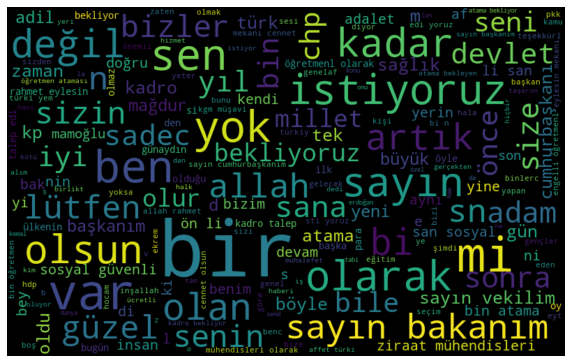

In [ ]:
all_words = ' '.join([text for text in dfPoliticalAll_train['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

#### Words in not Political Tweets

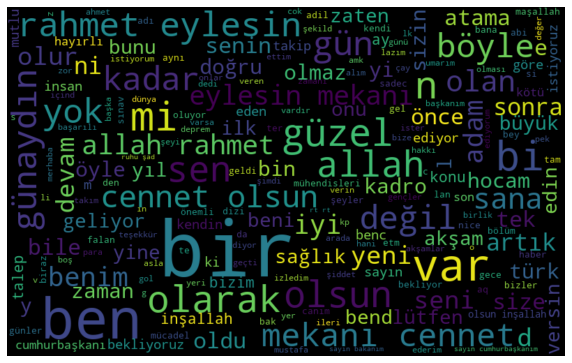

In [ ]:
normal_words =' '.join([text for text in dfPoliticalAll_train['tidy_tweet'][dfPoliticalAll_train['isPolitical'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

#### Words in Political Tweets

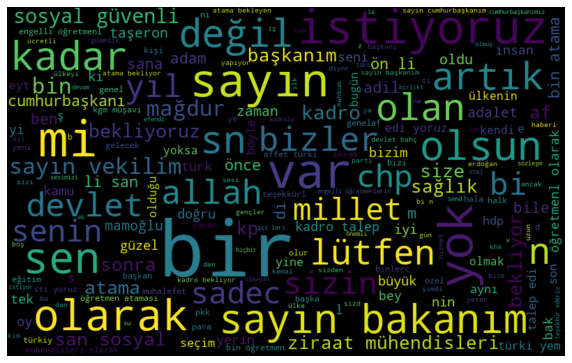

In [ ]:
normal_words =' '.join([text for text in dfPoliticalAll_train['tidy_tweet'][dfPoliticalAll_train['isPolitical'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

#### Impact of Hashtags

In [ ]:
# function to collect hashtags
def hashtag_extract(x):    
    hashtags = []  
    # Loop over the words in the tweet  
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)     
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets 
HT_notPolitical = hashtag_extract(dfPoliticalAll_train['text'][dfPoliticalAll_train['isPolitical'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_Political = hashtag_extract(dfPoliticalAll_train['text'][dfPoliticalAll_train['isPolitical'] == 1]) 
# unnesting list 
HT_notPolitical = sum(HT_notPolitical,[])
HT_Political = sum(HT_Political,[])

for i in HT_notPolitical:
  if i in HT_Political:
    HT_notPolitical.remove(i)
    HT_Political.remove(i)

##### Hashtags in not Political Tweets

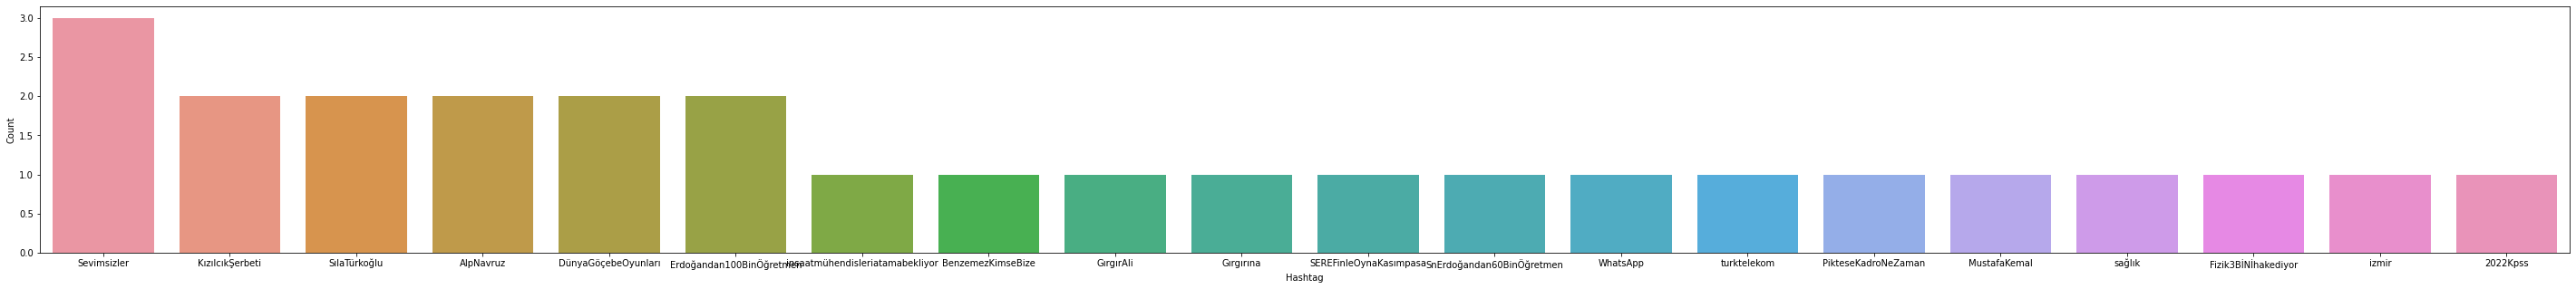

In [ ]:
a = nltk.FreqDist(HT_notPolitical)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags 


d = d.nlargest(columns="Count", n = 20) 

plt.figure(figsize=(50,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

##### Hashtags in Political Tweets

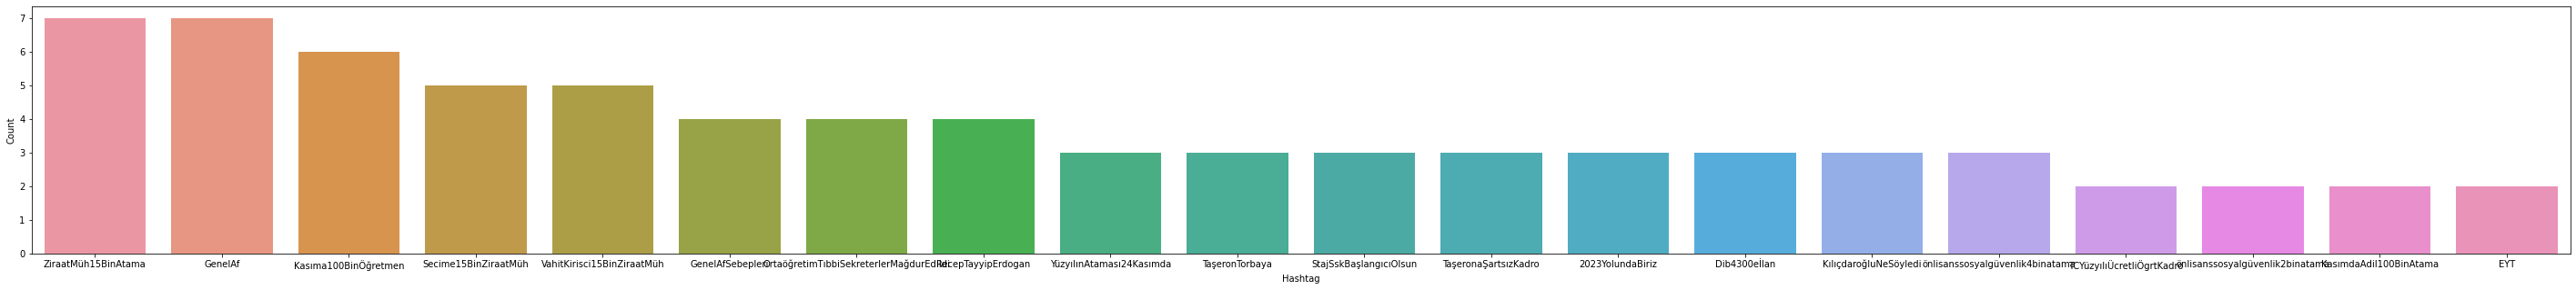

In [ ]:
b = nltk.FreqDist(HT_Political) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(50,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [ ]:
X = dfPoliticalAll_train[['tidy_tweet','text']]
y = dfPoliticalAll_train['isPolitical']

#### Bag-of-Words Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words=sw)
bow = bow_vectorizer.fit_transform(dfPoliticalAll_train['tidy_tweet'])
bow.shape

(3000, 1000)

### 2.1.3. Train - validation split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
y_valid.value_counts()

1    391
0    209
Name: isPolitical, dtype: int64

### 2.1.4. Train the model

Here, you may use different models such as neural networks, XGBoost, AdaBoost, RandomForest, Linear Regression, Logistic Regression etc. to see which model does the best. Also, you can use grid_search_cv() or a basic for loop to optimize the hyperparameters of your model.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and then get the vectors
X_bow_train = count_vector.fit_transform(X_train['text'])

# Transform validation and testing data without learning the statistics and get the matrix. 
X_bow_valid = count_vector.transform(X_valid['text'])

X_bow_train.toarray()[:5]
X_bow_train.shape

(2400, 12042)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy


lr = LogisticRegression()
lr.fit(X_bow_train, y_train)

from sklearn.model_selection import cross_val_score
model_lr_acc = cross_val_score(estimator=lr, X=X_bow_train, y=y_train, cv=5, n_jobs=-1)
print(model_lr_acc, "\n")


y_pred_valid_lr = lr.predict(X_bow_valid)

"""
i = 0; # for keeping track of validation list
for index, row in X_valid.iterrows():
  for hashtag in HT_Political:
    if row['text'].find(hashtag) != -1:
      y_pred_valid_lr[i].re = 1
      i+=0;
"""
print("\n")
print("Logistic Regression Results:")
acc_score = accuracy_score(y_valid, y_pred_valid_lr)
confusion = confusion_matrix(y_valid, y_pred_valid_lr)
mse = mean_squared_error(y_valid, y_pred_valid_lr)
f1_s = f1_score(y_valid, y_pred_valid_lr)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion, "\n",
      "F1 Score:", "\n", f1_s)

[0.79791667 0.78541667 0.77291667 0.79375    0.79375   ] 



Logistic Regression Results:
MSE: 0.20666666666666667 
 Accuracy Score: 0.7933333333333333 
 Confusion Matrix: 
 [[125  84]
 [ 40 351]] 
 F1 Score: 
 0.8498789346246973


In [ ]:
import numpy as np
a = np.array[()]

In [ ]:
"""
from nltk.tag.sequential import NaiveBayesClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_val_score

naive_bayes = GaussianNB()
stack = StackingClassifier(estimators=[("lr",lr),("naive_bayes",naive_bayes)], final_estimator=LogisticRegression())
#stack.fit(X_bow_train,y_train)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(stack, X_bow_train, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 
print("\n")

stack.fit(X_bow_train,y_train)
preds = stack.predict(X_bow_valid)

acc_score1 = accuracy_score(y_valid, preds)
confusion1 = confusion_matrix(y_valid, preds)
mse1 = mean_squared_error(y_valid, preds)
f1_s = f1_score(y_valid, preds)

print("\n", "Stack Model")
print("MSE:", mse1, "\n",
      "Accuracy Score:", acc_score1, "\n",
      "Confusion Matrix:", "\n", confusion1)
"""

'\nfrom nltk.tag.sequential import NaiveBayesClassifier\nfrom sklearn.ensemble import StackingClassifier\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.model_selection import StratifiedKFold, cross_val_score\n\nnaive_bayes = GaussianNB()\nstack = StackingClassifier(estimators=[("lr",lr),("naive_bayes",naive_bayes)], final_estimator=LogisticRegression())\n#stack.fit(X_bow_train,y_train)\n\nsk_folds = StratifiedKFold(n_splits = 5)\n\nscores = cross_val_score(stack, X_bow_train, y_train, cv = sk_folds)\n\nprint("Cross Validation Scores: ", scores)\nprint("Average CV Score: ", scores.mean())\nprint("Number of CV Scores used in Average: ", len(scores)) \nprint("\n")\n\nstack.fit(X_bow_train,y_train)\npreds = stack.predict(X_bow_valid)\n\nacc_score1 = accuracy_score(y_valid, preds)\nconfusion1 = confusion_matrix(y_valid, preds)\nmse1 = mean_squared_error(y_valid, preds)\nf1_s = f1_score(y_valid, preds)\n\nprint("\n", "Stack Model")\nprint("MSE:", mse1, "\n",\n      "Accuracy Score

## 2.2. Bot Detection

### 2.2.1. Merge dfBotAll data with labels

In [ ]:
dfBotAll.user_screen_name = dfBotAll.user_screen_name.str.lower()

In [ ]:
dfBotAll_train = dfBotAll.merge(trainingUserDf,
                               left_on='user_screen_name',
                               right_on='screen_name')

dfBotAll_train

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,retweet_total_ratio,num_median_favorites,num_of_tweets,screen_name,isBot
0,1512081815292432394,sezgin,sezgin953116371,,,46,430,0,0.096639,0.050251,0.0,199.0,sezgin953116371,No
1,1425452291428077571,Adem Koç,gogoadem61,,,14,171,0,0.075676,0.761062,0.0,113.0,gogoadem61,No
2,328164303,Necmettin Balıkçı,dewil511,,,21,49,0,0.300000,0.010101,0.0,198.0,dewil511,Yes
3,1343666971368431622,Night Bird⁷🦉,midnight__bird,,"La vie est un sommeil, l’amour en est le rêve...",422,260,48,0.618768,0.085000,1.0,200.0,midnight__bird,No
4,1240932880488038400,Samed Pınarcı,samedpinarci,,Orman Mühendisi - Orman İşletme Şefi - Orman Genel Müdürlüğü,133,202,60,0.397015,0.780000,0.0,200.0,samedpinarci,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1286770207134973954,Hamide Arabacı,anka6054,,,151,61,0,0.712264,0.000000,1.0,200.0,anka6054,No
2996,1598032338323214338,atamabekleyenbahceci,atamabekleyenzz,,,173,367,0,0.320370,0.580000,0.0,200.0,atamabekleyenzz,No
2997,760235343966863360,Emrah İNCİ,memrahinci,Istanbul - Bayburt,Researcher | Middle East | Political Science | Corporate Communications,5863,5905,71,0.498215,0.040000,36.0,200.0,memrahinci,No
2998,1553973684100124672,Murat Kkk,muratkkk18,,Normal sıradan bir insanım,1,10,26,0.090909,0.769231,0.0,13.0,muratkkk18,No


In [ ]:
dfBotAll_train[dfBotAll_train['isBot']=="No"]

,user_id,user_name,user_screen_name,user_location,user_description,user_followers_count,user_friends_count,description_len,followers_to_all_ratio,retweet_total_ratio,num_median_favorites,num_of_tweets,screen_name,isBot
0,1512081815292432394,sezgin,sezgin953116371,,,46,430,0,0.096639,0.050251,0.0,199.0,sezgin953116371,No
1,1425452291428077571,Adem Koç,gogoadem61,,,14,171,0,0.075676,0.761062,0.0,113.0,gogoadem61,No
3,1343666971368431622,Night Bird⁷🦉,midnight__bird,,"La vie est un sommeil, l’amour en est le rêve...",422,260,48,0.618768,0.085000,1.0,200.0,midnight__bird,No
4,1240932880488038400,Samed Pınarcı,samedpinarci,,Orman Mühendisi - Orman İşletme Şefi - Orman Genel Müdürlüğü,133,202,60,0.397015,0.780000,0.0,200.0,samedpinarci,No
5,1352372158094315524,Nis,sarilaciask07,,SONSUZA DEK FENERBAHÇE \n\nKüçük büyük her türlü Fenerbahçe taraftarının hesaplarına geri takip yapıyorum birlikte büyüyelim💛💙,331,393,124,0.457182,0.212121,1.0,198.0,sarilaciask07,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1286770207134973954,Hamide Arabacı,anka6054,,,151,61,0,0.712264,0.000000,1.0,200.0,anka6054,No
2996,1598032338323214338,atamabekleyenbahceci,atamabekleyenzz,,,173,367,0,0.320370,0.580000,0.0,200.0,atamabekleyenzz,No
2997,760235343966863360,Emrah İNCİ,memrahinci,Istanbul - Bayburt,Researcher | Middle East | Political Science | Corporate Communications,5863,5905,71,0.498215,0.040000,36.0,200.0,memrahinci,No
2998,1553973684100124672,Murat Kkk,muratkkk18,,Normal sıradan bir insanım,1,10,26,0.090909,0.769231,0.0,13.0,muratkkk18,No


### 2.2.2. Separate X and y values
We use only 4 features here to create a baseline model. However, it is not enough to get good results.

In [ ]:
dfBotAll_train["user_location"] = dfBotAll_train["user_location"].apply(lambda x: 1 if x != ""  else 0)

In [ ]:
dfBotAll_train["user_location"]

0       0
1       0
2       0
3       0
4       0
       ..
2995    0
2996    0
2997    1
2998    0
2999    0
Name: user_location, Length: 3000, dtype: int64

In [ ]:
dfBotAll_train.isBot.value_counts()

No     2424
Yes     576
Name: isBot, dtype: int64

In [ ]:
#X = dfBotAll_train[['followers_to_all_ratio', 'retweet_total_ratio', 'num_median_favorites','num_of_tweets','user_location','description_len']]
X = dfBotAll_train[['followers_to_all_ratio', 'retweet_total_ratio', 'num_median_favorites','num_of_tweets','user_location']]
y = dfBotAll_train.isBot.apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
"""
import imblearn
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
"""

'\nimport imblearn\n# transform the dataset\nfrom imblearn.over_sampling import SMOTE\noversample = SMOTE()\nX, y = oversample.fit_resample(X, y)\n'

### 2.2.3. Train-test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

### 2.2.4. Train the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# create an instance
dtc_bot = DecisionTreeClassifier()

# fit your model
dtc_bot.fit(X_train, y_train)

# make predictions
preds = dtc_bot.predict(X_valid)

# evaluate on validation set
acc_score = accuracy_score(y_valid, preds)
confusion = confusion_matrix(y_valid, preds)
f1_s2 = f1_score(y_valid, preds)
mse = mean_squared_error(y_valid, preds)

print("MSE:", mse, "\n",
      "Accuracy Score:", acc_score, "\n",
      "Confusion Matrix:", "\n", confusion, "\n",
      "F1 Score:", "\n", f1_s2)

MSE: 0.27 
 Accuracy Score: 0.73 
 Confusion Matrix: 
 [[403  90]
 [ 72  35]] 
 F1 Score: 
 0.30172413793103453


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
# create an instance

abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)



# fit your model

abc.fit(X_train,y_train)

# make predictions
predict_abc = abc.predict(X_valid)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(abc, X_train, y_train, cv = sk_folds)
print(scores)


acc_score3 = accuracy_score(y_valid, predict_abc)
confusion3 = confusion_matrix(y_valid, predict_abc)
mse3 = mean_squared_error(y_valid, predict_abc)
f1_s3 = f1_score(y_valid, predict_abc)


print("\n", "AdaBoost Model")
print("MSE:", mse3, "\n",
      "Accuracy Score:", acc_score3, "\n",
       "Confusion Matrix:", "\n", confusion3, "\n",
      "F1 Score:", f1_s3,"\n")

y_valid.value_counts()

[0.82083333 0.8        0.79791667 0.79583333 0.81875   ]

 AdaBoost Model
MSE: 0.165 
 Accuracy Score: 0.835 
 Confusion Matrix: 
 [[479  14]
 [ 85  22]] 
 F1 Score: 0.30769230769230765 



0    493
1    107
Name: isBot, dtype: int64

# 3. MAKE PREDICTIONS

Here, you will make predictions with the models that you have trained above.

## 3.1. Predictions for Tweets (Political or Not)

In [ ]:
# read the evaluation file as follows
evaluationTweetDf = pd.read_csv('{}evaluation-round3-tweet.csv'.format(PATH_TO_DOWNLOADED), dtype={0: str}, header=None, names=['tweet_id']) ##change round number!!!
evaluationTweetDf = evaluationTweetDf.dropna()
evaluationTweetDf

# merge it with the political dataframe so that you can use the make predictions based on the variables
dfPolitical_test = dfPolitical.merge(evaluationTweetDf)

# define X as we did above in section (2.x.2. Separate X and y values)
X = dfPolitical_test[['text']]
X_bow_train = count_vector.transform(X["text"])

# make predictions based on these variables
predictions_political = lr.predict(X_bow_train)

### This part is important! We expect you to return your predictions in the following format:

In [ ]:
modelPredTweet = dict([(x,float(y)) for x,y in zip([*dfPolitical_test.tweet_id], predictions_political)])
modelPredTweet

{'1434787703783051264': 1.0,
 '1367571642604544000': 0.0,
 '1589993032975544320': 1.0,
 '1565312596135354373': 1.0,
 '1579558096833511424': 1.0,
 '1439547067337256967': 0.0,
 '1559963768372740098': 1.0,
 '1562853131251118081': 0.0,
 '1586021183958704128': 1.0,
 '1585766233491886081': 1.0,
 '1427746815420604417': 1.0,
 '1352635736537882629': 1.0,
 '1415032260571680768': 0.0,
 '1548636597628899328': 1.0,
 '1564926450096013313': 1.0,
 '1585634359612420101': 1.0,
 '1597138789108895744': 1.0,
 '1391681495622995971': 0.0,
 '1389951943343316995': 0.0,
 '1452348722810138646': 1.0,
 '1595829502021623812': 0.0,
 '1413108476348354562': 0.0,
 '1579408398894137344': 1.0,
 '1570758749606019073': 1.0,
 '1366091745772077058': 0.0,
 '1588936302086737925': 1.0,
 '1584922292127256577': 1.0,
 '1586279180983042050': 1.0,
 '1434963357023473671': 0.0,
 '1399687111234756612': 0.0,
 '1363226564683522051': 1.0,
 '1596978345560150016': 1.0,
 '1593686506622914560': 1.0,
 '1350478535954198530': 0.0,
 '157227522855

## 3.2. Predictions for Users (Bot or Not)

In [ ]:
evaluationUserDf = pd.read_csv('{}evaluation-round3-user.csv'.format(PATH_TO_DOWNLOADED), dtype={0: str}, header=None, names=['user_screen_name']) ## change round numberr!!!
evaluationUserDf = evaluationUserDf.dropna()

# merge it with the political dataframe so that you can use the make predictions based on the variables
dfBot_test = dfBotAll.merge(evaluationUserDf)

dfBot_test["user_location"] = dfBot_test["user_location"].apply(lambda x: 1 if x != ""  else 0)
dfBot_test["user_location"]

0       0
1       0
2       0
3       0
4       1
       ..
4994    0
4995    0
4996    0
4997    1
4998    1
Name: user_location, Length: 4999, dtype: int64

In [ ]:
# define X as we did above in section (2.x.2. Separate X and y values)
X = dfBot_test[['followers_to_all_ratio', 'retweet_total_ratio', 'num_median_favorites',"user_location","num_of_tweets"]]

# make predictions based on these variables
predictions_bot = abc.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
modelPredUser = dict([(x,float(y)) for x,y in zip([*dfBot_test.user_screen_name], predictions_bot)])
modelPredUser

{'biologselim': 0.0,
 'omerakdag34': 0.0,
 'bilgin21604923': 0.0,
 '_sydneycarton_': 0.0,
 'denizlihabercom': 0.0,
 'burakerbaychp': 0.0,
 'mvnez': 0.0,
 'qara118': 0.0,
 'nabiyonyevrum': 0.0,
 'farukhalit2': 0.0,
 'harlunoshi': 0.0,
 'heritagepaix': 0.0,
 'nuranwolf': 0.0,
 'politikgundem': 0.0,
 'isakethudax': 0.0,
 'enveraysevera': 0.0,
 'ilaydejaneiro': 0.0,
 '1905anason': 0.0,
 'eraydurgut03': 0.0,
 'dasiskein': 0.0,
 'ercan_bas29': 0.0,
 'mett_1907': 0.0,
 'ondemir066': 0.0,
 'semihyeteer': 0.0,
 'haberinyokcokk': 0.0,
 'meleky_ozaydin': 0.0,
 'mehmetaltay64': 0.0,
 'nurtencam2': 0.0,
 'bilobi4': 0.0,
 'yorumsuzadam87': 0.0,
 'twitsildiren': 0.0,
 '21gramlife1': 0.0,
 'cakan0_': 0.0,
 'oguzksalici': 0.0,
 'canpixlr': 0.0,
 'ozlemesor': 0.0,
 'emre_caliskann': 0.0,
 'oguzhanonel': 0.0,
 'mintchocolatemx': 0.0,
 'mehmet07454846': 0.0,
 'begumkarabeyx': 0.0,
 'imamgibiimam': 0.0,
 'durdane52': 0.0,
 'rk_ozanyali': 0.0,
 'suaterce': 0.0,
 'ibrahimcalsskan': 0.0,
 'goksubayy': 0.0,
 '

# PREPARE SUBMISSION

You will need to submit exact same file produced by using the following code. Any deviation from the desired format willbe marked as 0.

In [ ]:
# Explain your approach

data_explanations = '''
For the Political tweet classification part, I converted tweet texts into bag-of-words vectorization. 
For the data observation, I checked the words and hashtags that are mostly used in both political and non-political tweets.
For both identification parts, I did not perform a lot of data handling proccess, because I was using most of the attributes provided.
'''

feature_explanations = '''
For the political tweet classification, I created a feature called 'tidy_tweet' which constitutes text that is tokenized, lowercase, and does not include any punctuations.
However, when I used this attribute while training the model, it caused lower scores so rather than using it I utilized vectorized texts of tweets.
For the bot detection, I just used the attributes provided such as  'description_len', 'followers_to_all_ratio', 'retweet_total_ratio', 'num_median_favorites', 'user_location'.
'''

model_explanations = '''
For the political tweet classification, I tried a lot of bag-of-words models such as tf-idf, and vectors2documents approaches and used them in Naive Bayes and Logistic Regression models.
In the end, I just used vectorized bag-of-words approach with a logistic regression model which gave the highest scores.
For the bot detection part, in the beginning, I tried a lot of models such as Adaboost, SVM, Logistic Regression, and Stack modelling. However, Adaboost gave the highest scores.
However, the problem with the Adaboost model was that it was giving a low F1 score which resulted by a class imbalance in the dataset. For overcoming that problem I utilized class oversampling
the approach called SMOTE which reduced accuracy a bit but increased the F1 score enormously.
'''

additional_explanations = '''
For the political tweet classification part, I wanted to use both the bag-of-words approach with logistic regression and naive Bayes and random forest and Adaboost models together. However, the problem was that random forests and 
AdaBoost models were expecting numerical attributes while in the bag-of-words approach it was necessary to use vectorized text. Since the domains are different it was not possible for me to use them in any ensemble learning
methods that I knew. The trick that I used to create a database that consists of all of the predictions for a given tweet by the models I used, then kind of performing a majority voting approach. However, it did not give 
a score as high as the bag-of-words approach with logistic regression, and I thought it may cause an overfitting problem, so I declined to use it.
'''

In [ ]:
predictions = {
    'round': ROUND,
    'student_id': STUDENT_ID,
    'user_predictions': modelPredUser,
    'tweet_predictions': modelPredTweet,
    'explanations': {
        'data': data_explanations,
        'feature': feature_explanations,
        'model': model_explanations,
        'other': additional_explanations,
    }
}


with open('/content/drive/MyDrive/CS412/predictions-{}_round{}.json'.format(STUDENT_ID, ROUND), 'w') as fl:
    fl.write(json.dumps(predictions, indent=4))

In [ ]:
# Test your submission file

submission = json.load(open('/content/drive/MyDrive/CS412/predictions-{}_round{}.json'.format(STUDENT_ID, ROUND), 'r'))
submission

{'round': 3,
 'student_id': '28132',
 'user_predictions': {'biologselim': 0.0,
  'omerakdag34': 0.0,
  'bilgin21604923': 0.0,
  '_sydneycarton_': 0.0,
  'denizlihabercom': 0.0,
  'burakerbaychp': 0.0,
  'mvnez': 0.0,
  'qara118': 0.0,
  'nabiyonyevrum': 0.0,
  'farukhalit2': 0.0,
  'harlunoshi': 0.0,
  'heritagepaix': 0.0,
  'nuranwolf': 0.0,
  'politikgundem': 0.0,
  'isakethudax': 0.0,
  'enveraysevera': 0.0,
  'ilaydejaneiro': 0.0,
  '1905anason': 0.0,
  'eraydurgut03': 0.0,
  'dasiskein': 0.0,
  'ercan_bas29': 0.0,
  'mett_1907': 0.0,
  'ondemir066': 0.0,
  'semihyeteer': 0.0,
  'haberinyokcokk': 0.0,
  'meleky_ozaydin': 0.0,
  'mehmetaltay64': 0.0,
  'nurtencam2': 0.0,
  'bilobi4': 0.0,
  'yorumsuzadam87': 0.0,
  'twitsildiren': 0.0,
  '21gramlife1': 0.0,
  'cakan0_': 0.0,
  'oguzksalici': 0.0,
  'canpixlr': 0.0,
  'ozlemesor': 0.0,
  'emre_caliskann': 0.0,
  'oguzhanonel': 0.0,
  'mintchocolatemx': 0.0,
  'mehmet07454846': 0.0,
  'begumkarabeyx': 0.0,
  'imamgibiimam': 0.0,
  'du